In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
mainpath = "/Users/Isabot/Desktop/Felipe/Practicas/MachineLearning/IAN-AF/data";
filename = "private___Tabela_AFisica.csv"
filename2 = "private___Tabela_AntropometriaMod.csv"
fullpath = os.path.join(mainpath, filename)
fullpath2 = os.path.join(mainpath, filename2)

In [445]:
#Para Modificar los archivos con , y pasarlos a . para que el df los tome como float y no como objetos
#filename = "archivo.txt"
#char1 = '8'
#char2 = '9'

#filer = open(filename, "r")
#filew = open(filename+'.mod', "w")

#buff = filer.read()
#rbuff = buff.replace(char1, char2)

#filew.write(rbuff)

#filer.close()
#filew.close()

In [4]:
data = pd.read_csv(fullpath, sep=";")
data2 = pd.read_csv(fullpath2, sep=";")

In [5]:
data_final = pd.merge(left = data2, right = data , left_on="IAN_ID", right_on="IAN_ID")

In [ ]:
#Normalizacion de Datos

In [6]:
subdf = data_final[["PesoMed","AlturaMed"]]

In [7]:
subdf_norm = (subdf-subdf.min())/(subdf.max()-subdf.min())

In [46]:
def ClusterKmeans(modelo,x1,x2):
    max_k = 12## maximo número de clusters que vamos a crear
    K = range(1,max_k)
    ssw = []
    color_palette = [plt.cm.nipy_spectral(float(i)/max_k) for i in K]
    centroid = [sum(modelo)/len(modelo) for i in K]
    sst = sum(np.min(cdist(modelo, centroid, "euclidean"), axis = 1))

    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(modelo)
        ClusterIndicesNumpy(k, kmeanModel.labels_)
        centers = pd.DataFrame(kmeanModel.cluster_centers_)
        labels = kmeanModel.labels_
        print("Centroides Estimados \n")
        print(centers)
        print()
        ssw_k = sum(np.min(cdist(modelo, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
        ssw.append(ssw_k)

        label_color = [color_palette[i] for i in labels]

        ##Fabricaremos una silueta para cada cluster
        # Por seguridad, no hacemos silueta si k = 1 o k = len(X)
        if 1<k<len(modelo):
           ##Crear un subplot de una fila y dos columnas
            fig, (axis1,axis2) = plt.subplots(1,2)
            fig.set_size_inches(21,10)

            #El primer subplot contendrá la silueta, que puede tener valores desde -1 a 1
            #En nuestro caso, ya controlamos que los valores están entre -0.1 y 1
            axis1.set_xlim([-0.1, 1.0])
            #El número de clusters a insertar determinará el tamaño de cada barra
            #El coeficiente (n_clusters+1)*10 será el espacio en blanco que dejaremos 
            #entre siluetas individuales de cada cluster para separarlas.
            axis1.set_ylim([0, len(modelo)+ (k+1)*10])

            silhouette_avg = silhouette_score(modelo, labels)
            print("* Para k = ",k, " el promedio de la silueta es de :",silhouette_avg)
            sample_silhouette_values = silhouette_samples(modelo, labels)

            y_lower = 10
            for i in range(k):
                #Agregamos la silueta del cluster i-ésimo
                ith_cluster_sv = sample_silhouette_values[labels == i]
                print("   - Para i = ", i+1, " la silueta del cluster vale : ", np.mean(ith_cluster_sv))
                #Ordenamos descendientemente las siluetas del cluster i-ésimo
                ith_cluster_sv.sort()

                #Calculamos donde colocar la primera silueta en el eje vertical
                ith_cluster_size = ith_cluster_sv.shape[0]
                y_upper = y_lower + ith_cluster_size

                #Elegimos el color del cluster
                color = color_palette[i]

                #Pintamos la silueta del cluster i-ésimo
                axis1.fill_betweenx(np.arange(y_lower, y_upper),
                                   0, ith_cluster_sv, facecolor = color, alpha = 0.7)


                #Etiquetamos dicho cluster con el número en el centro
                axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))

                #Calculamos el nuevo y_lower para el siguiente cluster del gráfico
                y_lower = y_upper + 10 #dejamos vacías 10 posiciones sin muestra

            axis1.set_title("Representación de la silueta para k = %s"%str(k))
            axis1.set_xlabel("S(i)")
            axis1.set_ylabel("ID del Cluster")

            ##Fin de la representación de la silueta
        
        ##Plot de los k-means con los puntos respectivos
        plt.plot()
        plt.title("Clustering para k = %s"%str(k))
        plt.xlabel("Peso Medio")
        plt.ylabel("Altura Medio")
        plt.scatter(x1,x2, c=label_color)
        plt.scatter(centers[0], centers[1],c=color_palette, marker = "x")
        plt.show()
    plt.plot(K, 1-ssw/sst, "bx-")
    plt.xlabel("k")
    plt.ylabel("1-norm(SSw(k))")
    plt.title("La técnica del codo normalizado para encontrar el k óptimo")
    plt.show()
    
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    for k in range(clustNum):
        print("Para el Grupo",k)
        print("\n")
        a = np.where(labels_array == k)[0]
        bandera = 'FALSE'
        #for j in range(a.size):
         #   print(subdf[a[j]:a[j]+1])



In [19]:
dataX = subdf[(subdf["PesoMed"] != 999.9)]

In [21]:
dataX = dataX[(dataX["PesoMed"] != 777.7)]

In [23]:
dataX = dataX[(dataX["AlturaMed"] != 777.7)]

In [25]:
dataX = dataX[(dataX["AlturaMed"] != 999.9)]

In [27]:
y1 = dataX[["PesoMed"]].values

In [28]:
y2 = dataX[["AlturaMed"]].values

In [29]:
Y = np.array(list(zip(y1,y2))).reshape(len(y1), 2)

Para el Grupo 0


Centroides Estimados 

           0           1
0  66.124956  158.872755



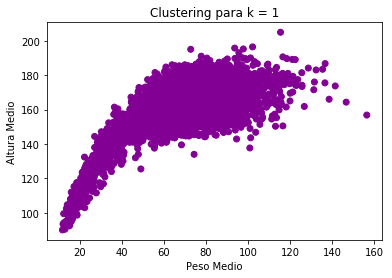

Para el Grupo 0


Para el Grupo 1


Centroides Estimados 

           0           1
0  72.295880  164.349707
1  27.787552  124.846713

* Para k =  2  el promedio de la silueta es de : 0.6153035818094601
   - Para i =  1  la silueta del cluster vale :  0.6192625351730572
   - Para i =  2  la silueta del cluster vale :  0.590708237975756


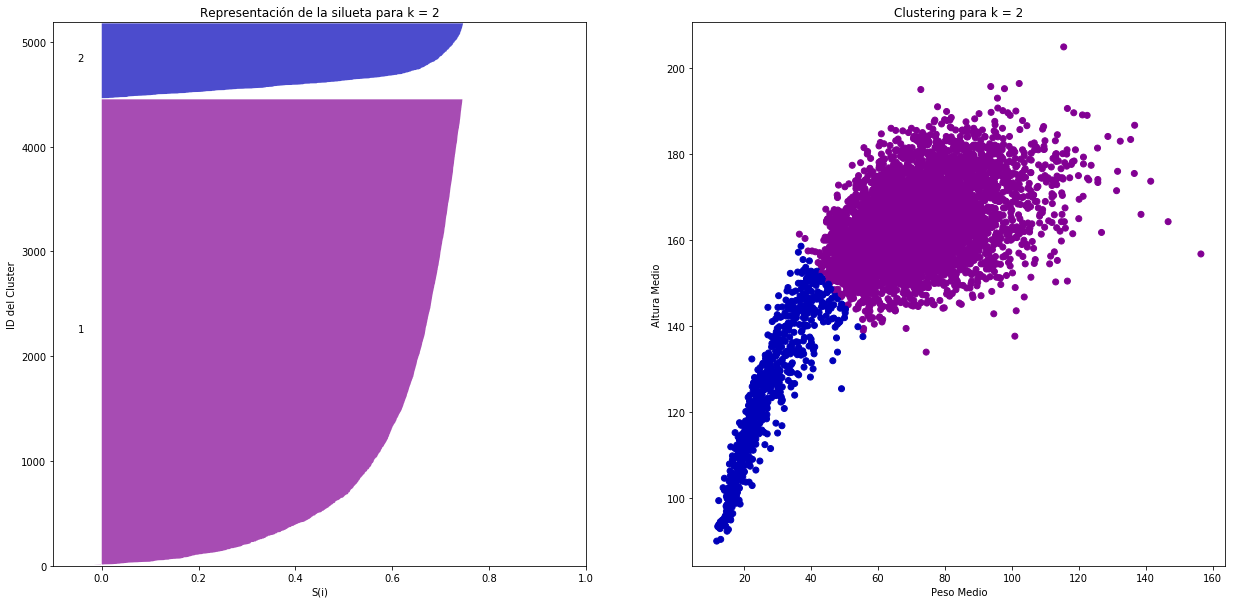

Para el Grupo 0


Para el Grupo 1


Para el Grupo 2


Centroides Estimados 

           0           1
0  60.091932  159.456041
1  85.541347  169.345821
2  24.607732  119.724399

* Para k =  3  el promedio de la silueta es de : 0.45159934165424104
   - Para i =  1  la silueta del cluster vale :  0.4691435394255566
   - Para i =  2  la silueta del cluster vale :  0.37770327822643474
   - Para i =  3  la silueta del cluster vale :  0.6330999365237359


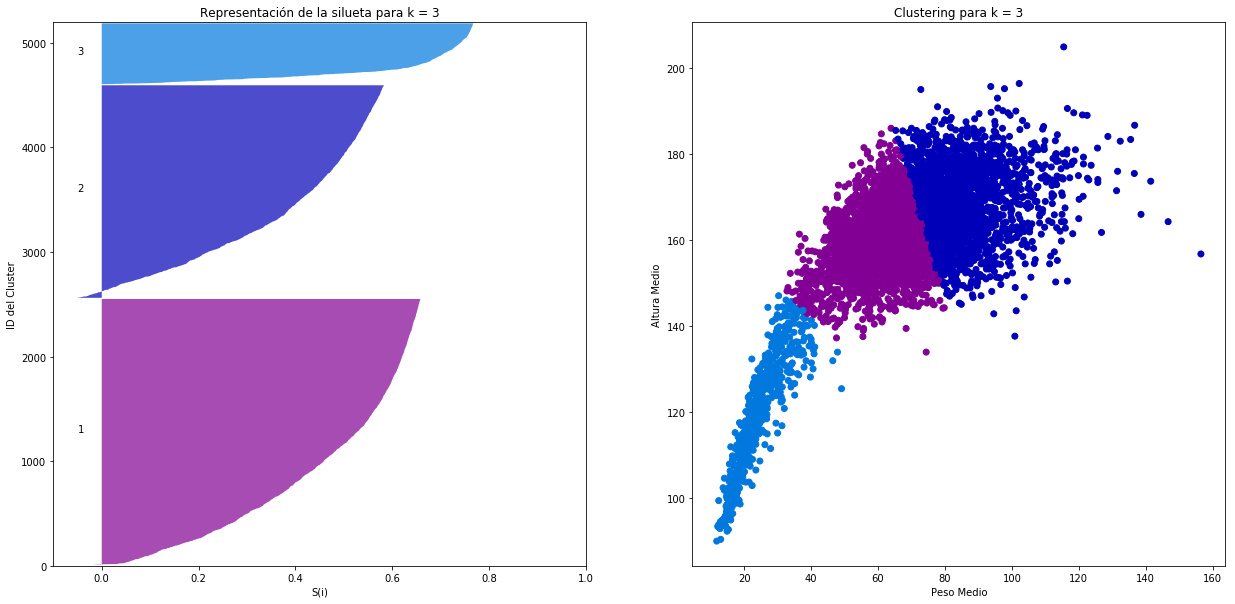

Para el Grupo 0


Para el Grupo 1


Para el Grupo 2


Para el Grupo 3


Centroides Estimados 

           0           1
0  93.805626  170.968865
1  23.670501  117.968275
2  72.172662  165.484716
3  54.096695  156.138599

* Para k =  4  el promedio de la silueta es de : 0.3853671918532384
   - Para i =  1  la silueta del cluster vale :  0.3239805860424046
   - Para i =  2  la silueta del cluster vale :  0.6329695933024991
   - Para i =  3  la silueta del cluster vale :  0.3349521321606999
   - Para i =  4  la silueta del cluster vale :  0.4080358654729306


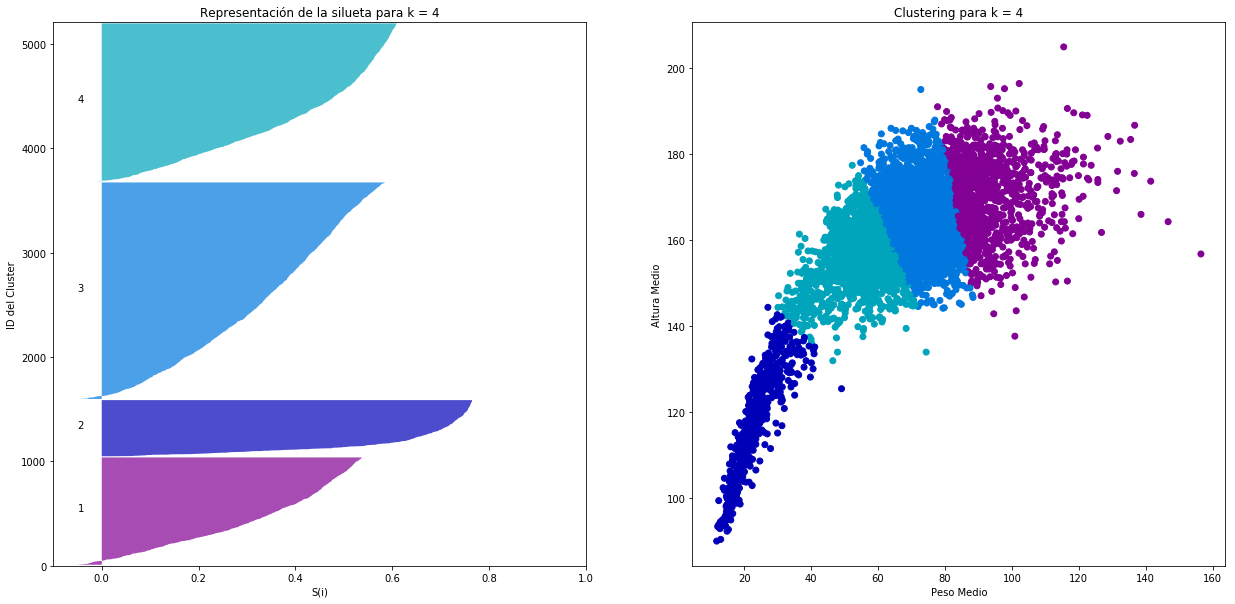

Para el Grupo 0


Para el Grupo 1


Para el Grupo 2


Para el Grupo 3


Para el Grupo 4


Centroides Estimados 

           0           1
0  72.017089  172.165904
1  53.306188  156.611955
2  23.670501  117.968275
3  73.864559  157.421104
4  95.788000  171.384588

* Para k =  5  el promedio de la silueta es de : 0.3794165606590344
   - Para i =  1  la silueta del cluster vale :  0.32070314639240566
   - Para i =  2  la silueta del cluster vale :  0.3963554125359997
   - Para i =  3  la silueta del cluster vale :  0.6302355240509047
   - Para i =  4  la silueta del cluster vale :  0.35128750398901054
   - Para i =  5  la silueta del cluster vale :  0.31371411804904065


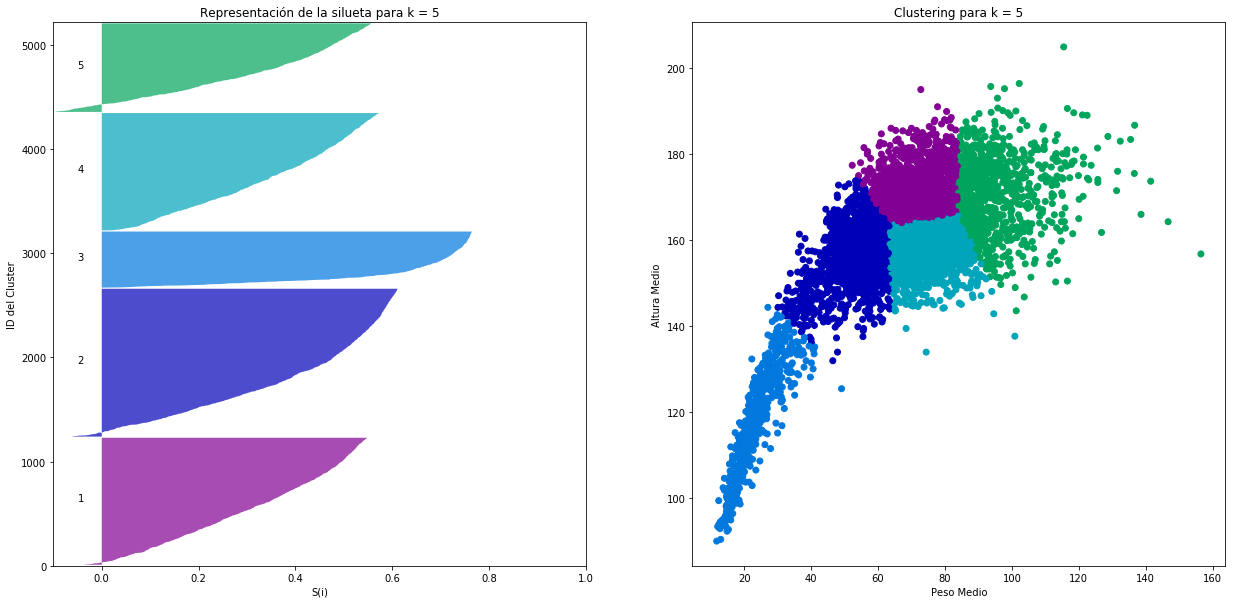

Para el Grupo 0


Para el Grupo 1


Para el Grupo 2


Para el Grupo 3


Para el Grupo 4


Para el Grupo 5


Centroides Estimados 

           0           1
0  19.933333  110.451014
1  73.190646  172.602466
2  56.119771  158.397908
3  96.852542  171.701173
4  75.551774  157.698466
5  34.306105  137.502035

* Para k =  6  el promedio de la silueta es de : 0.37763150642163734
   - Para i =  1  la silueta del cluster vale :  0.6058169330162796
   - Para i =  2  la silueta del cluster vale :  0.32377720623580936
   - Para i =  3  la silueta del cluster vale :  0.41350266313487516
   - Para i =  4  la silueta del cluster vale :  0.30910744059882184
   - Para i =  5  la silueta del cluster vale :  0.35101007130326717
   - Para i =  6  la silueta del cluster vale :  0.4123601709128803


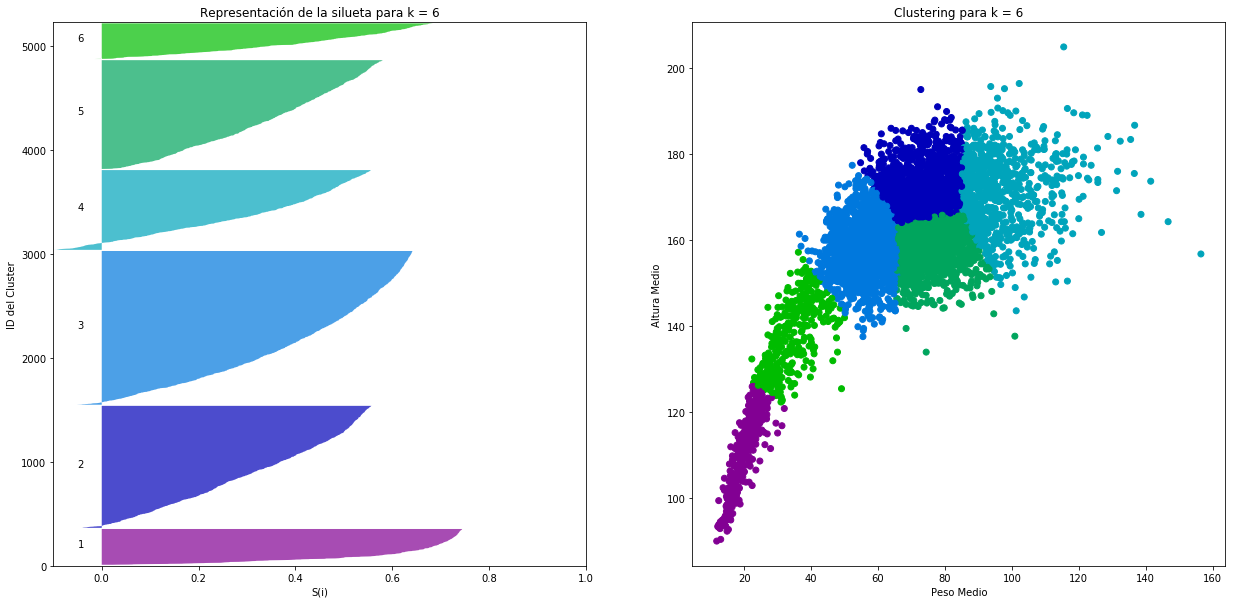

Para el Grupo 0


Para el Grupo 1


Para el Grupo 2


Para el Grupo 3


Para el Grupo 4


Para el Grupo 5


Para el Grupo 6


Centroides Estimados 

            0           1
0   54.478632  155.990940
1   82.187746  174.293326
2   19.768657  110.039104
3   76.614257  157.569990
4  103.087793  170.949765
5   64.868352  168.141355
6   33.156250  135.847187

* Para k =  7  el promedio de la silueta es de : 0.36500760160385537
   - Para i =  1  la silueta del cluster vale :  0.3698651632110098
   - Para i =  2  la silueta del cluster vale :  0.36593461092971014
   - Para i =  3  la silueta del cluster vale :  0.5933830724390985
   - Para i =  4  la silueta del cluster vale :  0.30592593813205715
   - Para i =  5  la silueta del cluster vale :  0.28104790884407316
   - Para i =  6  la silueta del cluster vale :  0.35560926745884897
   - Para i =  7  la silueta del cluster vale :  0.43126889645868205


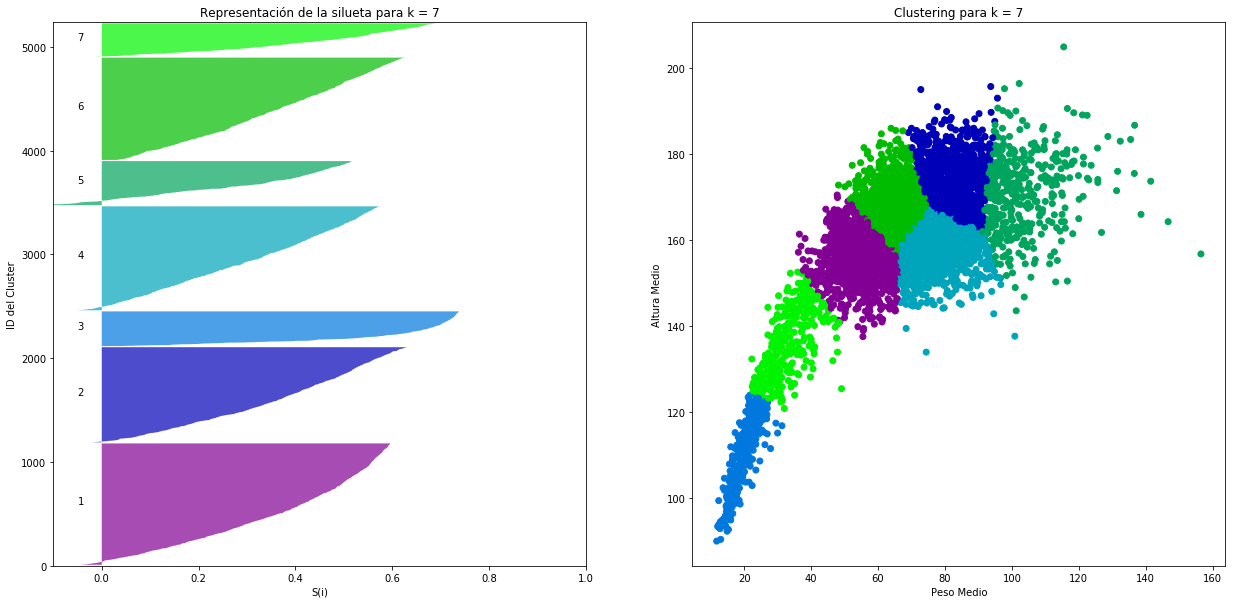

Para el Grupo 0


Para el Grupo 1


Para el Grupo 2


Para el Grupo 3


Para el Grupo 4


Para el Grupo 5


Para el Grupo 6


Para el Grupo 7


Centroides Estimados 

            0           1
0   67.583863  156.210718
1   31.764669  133.814826
2  104.835227  172.634943
3   82.333376  175.482107
4   65.640968  169.264086
5   83.787897  159.670651
6   51.938000  156.278421
7   19.376129  109.015484

* Para k =  8  el promedio de la silueta es de : 0.36093462865437675
   - Para i =  1  la silueta del cluster vale :  0.353926716235605
   - Para i =  2  la silueta del cluster vale :  0.43642176492622414
   - Para i =  3  la silueta del cluster vale :  0.3017799966336676
   - Para i =  4  la silueta del cluster vale :  0.35765540857733985
   - Para i =  5  la silueta del cluster vale :  0.3044299199323503
   - Para i =  6  la silueta del cluster vale :  0.30278137603150573
   - Para i =  7  la silueta del cluster vale :  0.38474983182538103
   - Para i =  8  la silueta del cluster vale :  0

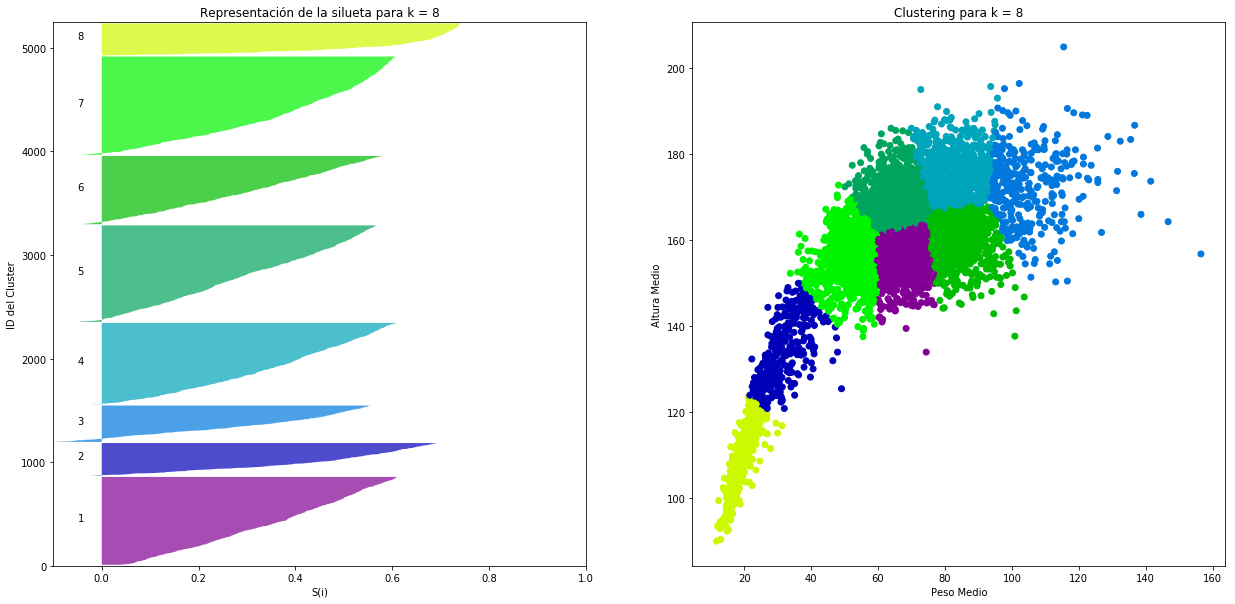

Para el Grupo 0


Para el Grupo 1


Para el Grupo 2


Para el Grupo 3


Para el Grupo 4


Para el Grupo 5


Para el Grupo 6


Para el Grupo 7


Para el Grupo 8


Centroides Estimados 

            0           1
0   49.934132  152.768862
1   87.459869  175.876835
2   19.162373  108.378305
3   85.359571  159.545975
4   69.202812  156.164181
5   72.013033  171.761730
6  108.892917  171.634167
7   58.354776  164.216808
8   30.334471  131.666212

* Para k =  9  el promedio de la silueta es de : 0.3530812673673504
   - Para i =  1  la silueta del cluster vale :  0.3210057901190492
   - Para i =  2  la silueta del cluster vale :  0.35974531737271065
   - Para i =  3  la silueta del cluster vale :  0.5865546692209461
   - Para i =  4  la silueta del cluster vale :  0.30771811520583797
   - Para i =  5  la silueta del cluster vale :  0.35013751553150424
   - Para i =  6  la silueta del cluster vale :  0.3148821324090004
   - Para i =  7  la silueta del cluster vale :  0.3130358586367212
   - Pa

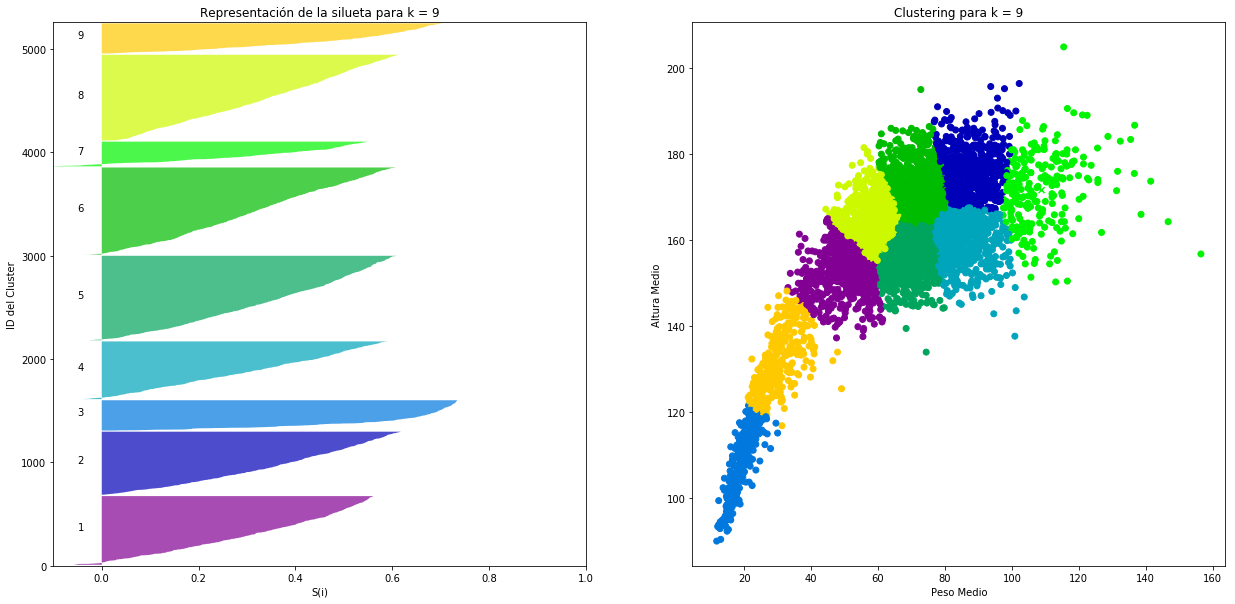

Para el Grupo 0


Para el Grupo 1


Para el Grupo 2


Para el Grupo 3


Para el Grupo 4


Para el Grupo 5


Para el Grupo 6


Para el Grupo 7


Para el Grupo 8


Para el Grupo 9


Centroides Estimados 

            0           1
0   75.006711  172.481974
1   26.480769  125.018077
2   61.815481  167.675872
3   89.407317  175.944278
4   69.604779  156.415809
5   53.600463  156.328737
6  110.188679  171.592925
7   39.397551  144.428163
8   17.990308  105.561233
9   85.858015  159.240267

* Para k =  10  el promedio de la silueta es de : 0.35735117515670733
   - Para i =  1  la silueta del cluster vale :  0.32062070455461983
   - Para i =  2  la silueta del cluster vale :  0.4924873170188615
   - Para i =  3  la silueta del cluster vale :  0.33065352167185275
   - Para i =  4  la silueta del cluster vale :  0.35410975938822054
   - Para i =  5  la silueta del cluster vale :  0.34820270485877425
   - Para i =  6  la silueta del cluster vale :  0.3623066109339121
   - Para i =  7  la silueta

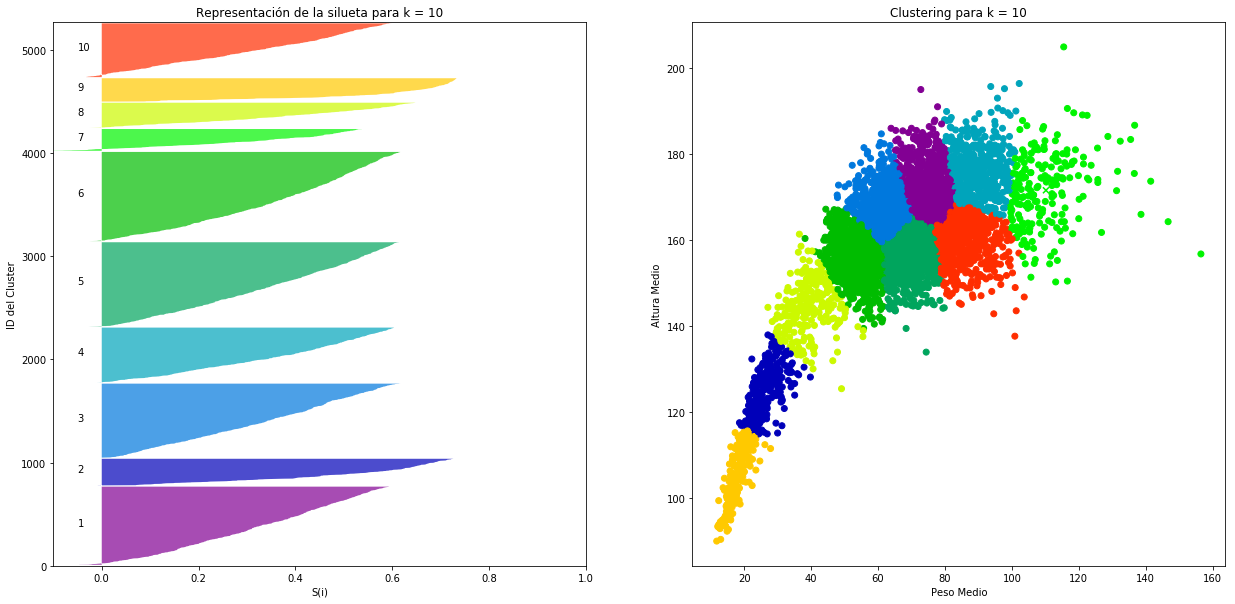

Para el Grupo 0


Para el Grupo 1


Para el Grupo 2


Para el Grupo 3


Para el Grupo 4


Para el Grupo 5


Para el Grupo 6


Para el Grupo 7


Para el Grupo 8


Para el Grupo 9


Para el Grupo 10


Centroides Estimados 

             0           1
0    75.338069  160.680552
1    26.517829  125.091085
2    62.642898  168.213773
3   111.950857  173.014857
4    75.988834  174.891790
5    52.360132  157.593289
6    18.022707  105.648908
7    39.537759  144.047303
8    64.904568  153.997390
9    90.379625  159.598391
10   90.285954  175.886164

* Para k =  11  el promedio de la silueta es de : 0.3532793206748741
   - Para i =  1  la silueta del cluster vale :  0.3241533222455438
   - Para i =  2  la silueta del cluster vale :  0.49314485442354933
   - Para i =  3  la silueta del cluster vale :  0.3449519435543938
   - Para i =  4  la silueta del cluster vale :  0.3244346584149501
   - Para i =  5  la silueta del cluster vale :  0.321987480130267
   - Para i =  6  la silueta del cluster val

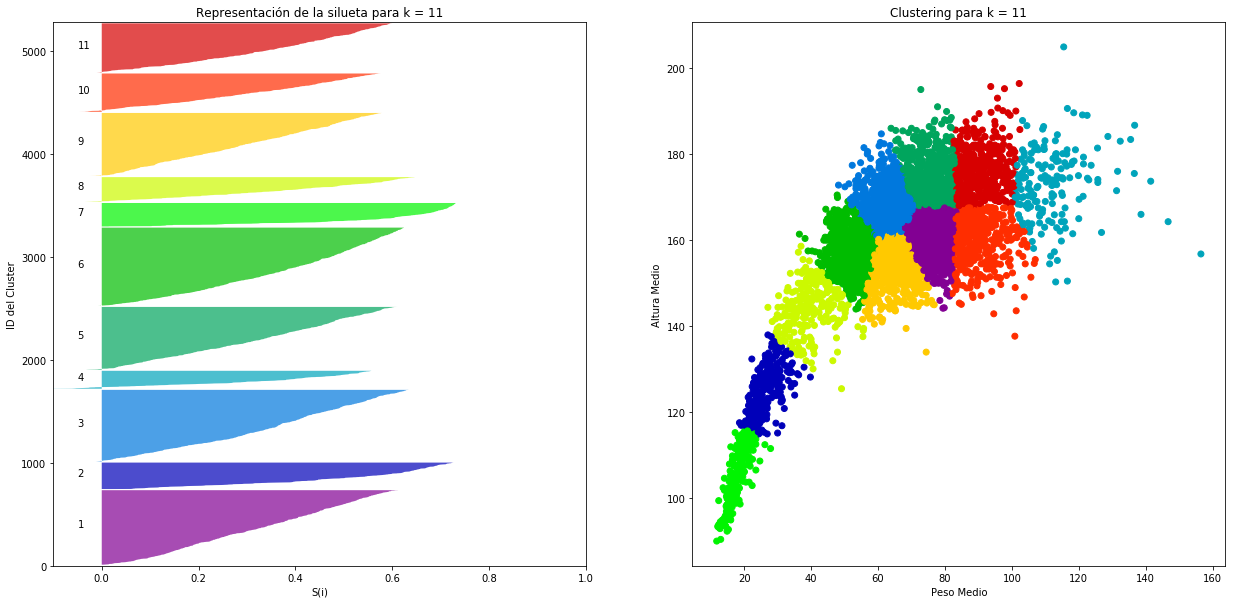

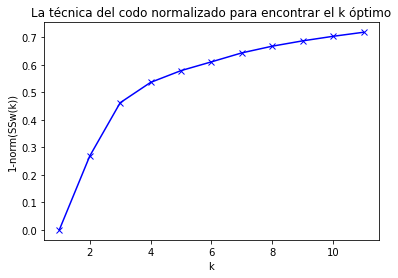

In [47]:
ClusterKmeans(Y,y1,y2)